# Install Requireed Packages

In [11]:
%%capture
!pip install gym
!pip install scikit-fuzzy
!pip install imageio-ffmpeg
!pip install pyglet

# Import Requireed Packages

In [1]:
import gym
import numpy as np
import skfuzzy as fuzz
from turtle import delay
from skfuzzy import control as ctrl

# Define Fuzzy Variable

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


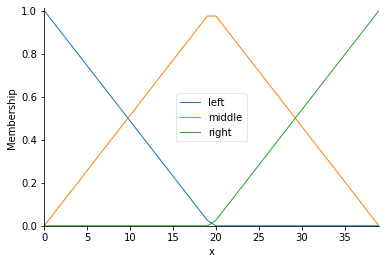

In [2]:
x = ctrl.Antecedent(np.arange(0, 40, 1), 'x')
x.automf(3, names=['left', 'middle', 'right'])
x.view()

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


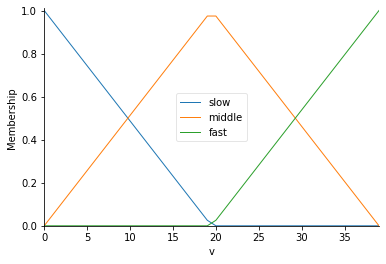

In [3]:
v = ctrl.Antecedent(np.arange(0, 40, 1), 'v')
v.automf(3, names=['slow', 'middle', 'fast'])
v.view()

C:\Users\acer\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


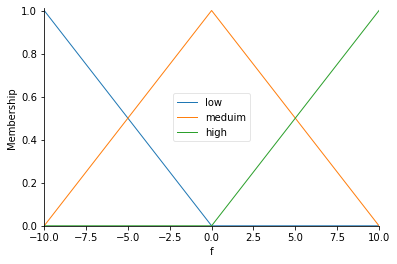

In [4]:
f  = ctrl.Consequent(np.arange(-10, 11, 1), 'f')
f.automf(3, names=[ 'low', 'meduim', 'high'])
f.view()

In [5]:
rule1 = ctrl.Rule(x['middle'] & v['fast'], f['high'])
rule2 = ctrl.Rule(x['middle'] & v['slow'], f['low'])
rule3 = ctrl.Rule(
    (x['left'] & v['slow']) |
    (x['left'] & v['middle']) |
    (x['left'] & v['fast']), f['meduim'])

In [6]:
car_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
car = ctrl.ControlSystemSimulation(car_ctrl)

In [7]:
n_states = 40

In [8]:
def obs_to_state(env, obs):
    """ Maps an observation to state """
    env_low = env.observation_space.low
    env_high = env.observation_space.high
    env_dx = (env_high - env_low) / n_states
    a = int((obs[0] - env_low[0])/env_dx[0])
    b = int((obs[1] - env_low[1])/env_dx[1])
    return a, b

In [9]:
env_name = 'MountainCarContinuous-v0'
env = gym.make(env_name)
env = gym.wrappers.Monitor(env, "./MountainCarContinuous-v0-results", force=True)

env.seed(0)
np.random.seed(0)

print ('----- Start -----')

frames = []
obs = env.reset()


for iteration in range(0, 200):
    frames.append(env.render(mode = 'rgb_np'))
    x, v = obs_to_state(env, obs)

    car.input['x'] = x
    car.input['v'] = v

    car.compute()
    
    fuzzy_action = car.output['f']

    obs, reward, done, _ = env.step([fuzzy_action]) 
    
    print(f'Iteration: {iteration} -- x: {x} -- v: {v} , obs: {obs} -- action: {fuzzy_action} -- reward: {reward}')
    
    if obs[0]>=0.45:
        print("finish in %d steps" %(iteration))
        delay(5000)
        break

env.close()

----- Start -----
Iteration: 0 -- x: 13 -- v: 20 , obs: [-5.886063e-01  5.216941e-04] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 1 -- x: 13 -- v: 20 , obs: [-0.58756673  0.00103955] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 2 -- x: 13 -- v: 20 , obs: [-0.58601695  0.00154976] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 3 -- x: 13 -- v: 20 , obs: [-0.5839684   0.00204855] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 4 -- x: 13 -- v: 20 , obs: [-0.58143616  0.00253223] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 5 -- x: 13 -- v: 20 , obs: [-0.57843894  0.00299722] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 6 -- x: 13 -- v: 20 , obs: [-0.57499886  0.00344005] -- action: 0.022256331542594095 -- reward: -4.9534429373386886e-05
Iteration: 7 -- x: 13 -- v: 20 , obs: [-0.5711414   0.0038574